# Distribution of taxi trips per district of New York City

In [1]:
import setup

In [2]:
def district_distribution(df, location):
    boroughs = {
        'bronx': setup.districts['bronx'],
        'brooklyn': setup.districts['brooklyn'], 
        'manhattan': setup.districts['manhattan'],
        'queens': setup.districts['queens'], 
        'staten_island': setup.districts['staten_island']
    }
    
    trips = df.loc[df['passenger_count'] > 0][location].value_counts()
    return [sum(trips[key] for key in trips.keys() if key in boroughs[borough]) for borough in boroughs]


def sum_up(year):
    return setup.np.sum(setup.np.array(year), axis=0)


def district_percentages(array):
    return (array / setup.np.sum(array)) * 100


def show_result(percentages, year, figure_label):
    print('-------------------- year average --------------------')
    print(percentages, '\n\n')

    for index, month_data in enumerate(year):
        print('--------------------', setup.month_labels[index], '--------------------')
        print(district_percentages(month_data), '\n')

    fig, ax = setup.plt.subplots(figsize=(10, 10))
    ax.set_title('distribution based on ' + figure_label + ' locations - NYC districts')
    ax.pie(percentages, colors=setup.district_colors, labels=setup.district_labels, autopct='%1.1f%%', startangle=90)
    setup.plt.show()


## Pickups
#### Calculate distribution based on the customer pickups

-------------------- year average --------------------
[1.24845980e-01 1.29279335e+00 9.20955199e+01 6.48244474e+00
 4.39604843e-03] 


-------------------- January --------------------
[8.51673032e-02 1.16546270e+00 9.26202614e+01 6.12577355e+00
 3.33507576e-03] 

-------------------- February --------------------
[7.78781112e-02 1.13712884e+00 9.29866575e+01 5.79625159e+00
 2.08397730e-03] 

-------------------- March --------------------
[1.10783913e-01 1.32567938e+00 9.24703345e+01 6.09008317e+00
 3.11898990e-03] 

-------------------- April --------------------
[1.13391500e-01 1.30123432e+00 9.20743601e+01 6.50807558e+00
 2.93851601e-03] 

-------------------- May --------------------
[1.19107608e-01 1.35074675e+00 9.18196562e+01 6.70715439e+00
 3.33501303e-03] 

-------------------- June --------------------
[1.18963260e-01 1.43259467e+00 9.17623899e+01 6.68277728e+00
 3.27486429e-03] 

-------------------- July --------------------
[1.17264836e-01 1.21838894e+00 9.17296355e+01 6

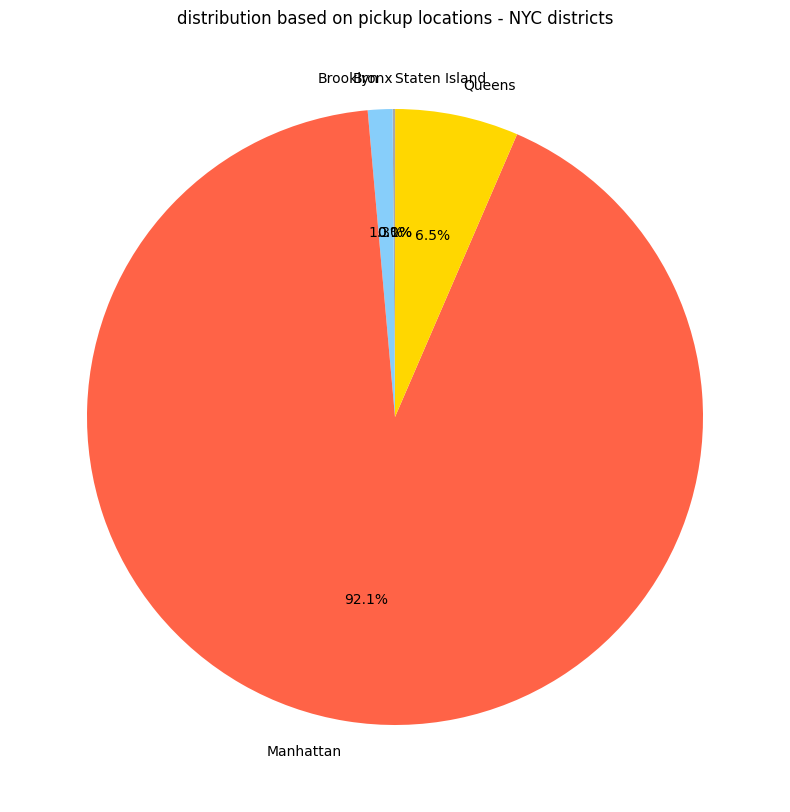

In [3]:
pu_year = [district_distribution(month, 'PULocationID') for month in setup.year]
show_result(district_percentages(sum_up(pu_year)), pu_year, 'pickup')

## Dropoffs
#### Calculate distribution based on the customer dropoffs

-------------------- year average --------------------
[6.62522653e-01 4.34047226e+00 9.00268490e+01 4.93452697e+00
 3.56290862e-02] 


-------------------- January --------------------
[5.93712964e-01 4.16825377e+00 9.06782305e+01 4.52914524e+00
 3.06575451e-02] 

-------------------- February --------------------
[5.74244309e-01 4.08898826e+00 9.07909854e+01 4.51735156e+00
 2.84304451e-02] 

-------------------- March --------------------
[6.48225447e-01 4.29283695e+00 9.01458842e+01 4.87968653e+00
 3.33668672e-02] 

-------------------- April --------------------
[6.57437034e-01 4.34877889e+00 9.01210849e+01 4.84042842e+00
 3.22707727e-02] 

-------------------- May --------------------
[6.83402267e-01 4.44797387e+00 8.97344042e+01 5.10064208e+00
 3.35775360e-02] 

-------------------- June --------------------
[6.77917725e-01 4.49788604e+00 8.95980966e+01 5.19152196e+00
 3.45776747e-02] 

-------------------- July --------------------
[6.99831991e-01 4.32958892e+00 8.97606824e+01 5

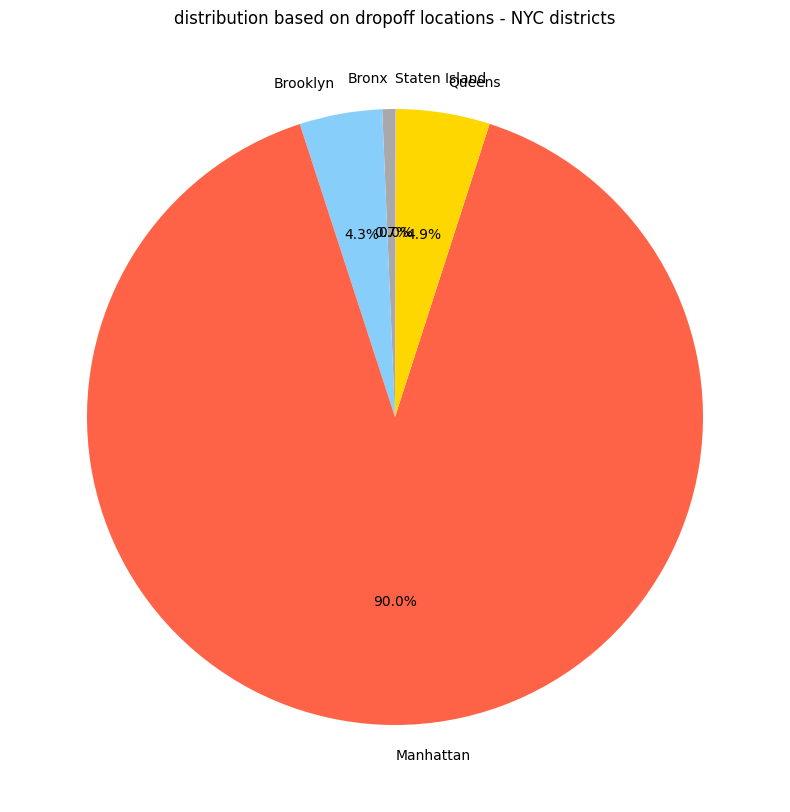

In [4]:
do_year = [district_distribution(month, 'DOLocationID') for month in setup.year]
show_result(district_percentages(sum_up(do_year)), do_year, 'dropoff')